# EG24 CITE-seq and flow cytometry comparisons

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
from ridgeplot import ridgeplot

import sklearn.mixture

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


Sample used in this notebook is EG24. 

### Sample information:
- ALL
- relapse
- 80% of bonemarrow cells are blasts


## Preparing files

In [3]:
#raw protein data, all datasets, raw + CLR and DSB normalized

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

adata.shape

(121340, 8051)

In [4]:
#select sample
adata_sample=adata[adata.obs['eg_code'] == 'EG24']

In [5]:
#selecting only leukemic cells

eg_blasts=adata_sample[adata_sample.obs['new_cell_type'] == 'leukemic']

eg_blasts.obs['new_cell_type']

AAACGGGTCTACTTAC-1-119    leukemic
AAAGATGAGGAGTAGA-1-119    leukemic
AAAGCAACACAGACTT-1-119    leukemic
AAAGCAACAGGGTATG-1-119    leukemic
AAAGCAACATCACAAC-1-119    leukemic
                            ...   
TTTGCGCAGCCAACAG-1-119    leukemic
TTTGGTTAGAGCTGCA-1-119    leukemic
TTTGTCAAGGTTCCTA-1-119    leukemic
TTTGTCAGTATCACCA-1-119    leukemic
TTTGTCATCAATCACG-1-119    leukemic
Name: new_cell_type, Length: 1011, dtype: category
Categories (1, object): ['leukemic']

In [6]:
#select CLR normalized protein counts (only leukemic cells)

prot_clr=eg_blasts.obsm['protein_expression_clr']

prot_clr

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACGGGTCTACTTAC-1-119,1.736651,3.117820,1.405150,0.796443,0.796443,0.931404,1.873557,1.270729,0.606020,0.000000,...,0.325352,0.673604,1.050297,0.228207,0.673604,1.725300,0.606020,0.413889,0.277958,0.767119
AAAGATGAGGAGTAGA-1-119,0.996005,3.812860,1.220955,0.450533,0.205109,0.647437,0.996005,0.760010,0.375225,0.000000,...,0.450533,0.450533,0.520565,0.293780,1.186804,2.086596,0.705307,0.450533,0.205109,0.953053
AAAGCAACACAGACTT-1-119,1.197050,3.369727,1.521922,0.297546,0.592563,0.526562,1.231351,0.712779,0.379852,0.109318,...,0.455895,0.526562,0.820082,0.207854,1.161531,2.280266,0.592563,0.379852,0.000000,0.962119
AAAGCAACAGGGTATG-1-119,1.322475,3.996407,0.364943,0.199028,0.631731,0.688622,1.054951,1.092575,0.507207,0.199028,...,0.199028,0.842125,0.364943,0.285422,1.292695,1.820520,0.793529,0.631731,0.199028,0.932758
AAAGCAACATCACAAC-1-119,1.484887,4.283628,1.032351,0.337687,0.471598,0.589676,1.507382,0.643868,0.337687,0.337687,...,0.406883,0.532379,0.589676,0.263346,0.532379,1.875396,0.877948,0.643868,0.337687,1.389481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGCCAACAG-1-119,0.886533,4.360054,0.437436,0.791729,0.437436,1.090390,2.161279,0.505900,0.284606,0.104131,...,0.284606,0.363938,0.437436,0.505900,0.630192,2.222564,0.437436,0.840254,0.000000,1.663946
TTTGGTTAGAGCTGCA-1-119,1.128562,3.500698,0.841896,0.631542,0.742240,0.438460,1.128562,1.054689,0.571231,0.198955,...,0.631542,0.571231,0.841896,0.198955,0.688422,2.201066,0.841896,0.198955,0.198955,0.438460
TTTGTCAAGGTTCCTA-1-119,1.019816,3.765607,0.482698,1.642062,0.634640,0.535952,1.432900,0.724457,0.535952,0.303460,...,0.482698,0.426447,0.535952,0.426447,0.766512,2.022730,0.919000,1.111393,0.084924,1.195282
TTTGTCAGTATCACCA-1-119,1.461947,3.748793,1.694896,1.404094,0.395433,0.636162,1.384042,0.636162,0.339460,0.339460,...,0.339460,0.678061,0.217136,0.280167,0.961936,2.142172,0.678061,0.678061,0.077737,1.461947


In [7]:
#select DSB normalized protein counts

prot_dsb=eg_blasts.obsm['protein_expression_dsb']

prot_dsb

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACGGGTCTACTTAC-1-119,5.235474,6.765774,3.392691,0.808834,3.707282,2.972158,9.732417,12.509436,2.973591,-1.510255,...,0.891578,1.754948,2.642372,0.046999,5.641718,6.519819,1.705478,1.870252,2.644428,2.188816
AAAGATGAGGAGTAGA-1-119,1.098276,7.259014,1.393066,-0.646733,-1.678327,-0.076621,1.911605,4.575176,-0.277374,-1.510255,...,0.454759,-1.025544,-0.143150,-0.384310,7.088585,5.934313,0.767981,0.640264,0.505158,1.311661
AAAGCAACACAGACTT-1-119,1.726878,5.649791,2.285491,-0.962689,0.447542,-0.641244,3.161980,4.131022,-0.277374,-0.705994,...,0.454759,-0.674252,0.707019,-0.850160,6.819550,6.734242,0.222203,0.174821,-1.242754,1.311661
AAAGCAACAGGGTATG-1-119,2.258353,8.020568,-1.144322,-1.139418,0.796405,0.182565,2.358955,7.488725,0.597070,0.028237,...,-1.055551,1.059134,-0.560621,-0.384310,8.081855,4.882566,1.259085,1.870252,0.505158,1.311661
AAAGCAACATCACAAC-1-119,3.047345,9.353902,1.068179,-0.799064,0.077523,-0.076621,5.328226,4.131022,-0.277374,1.329014,...,0.454759,-0.344264,0.225084,-0.384310,2.581179,5.473848,1.914316,2.235003,1.982996,4.218381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGCCAACAG-1-119,0.810795,9.314544,-0.924099,0.096173,-0.316384,2.041421,8.672638,2.642952,-0.762677,-0.705994,...,-0.513795,-1.401081,-0.344923,0.824153,3.034776,6.681586,-0.391966,3.224028,-1.242754,5.373164
TTTGGTTAGAGCTGCA-1-119,1.609993,6.275143,0.298399,-0.244180,1.439466,-0.950627,2.774324,7.173814,0.994076,0.028237,...,1.688773,-0.344264,0.852458,-0.850160,3.463843,6.574390,1.487356,-0.865119,0.505158,-1.362772
TTTGTCAAGGTTCCTA-1-119,1.726878,7.955753,-0.524583,2.300853,1.439466,-0.076621,5.455982,5.400477,1.368383,1.329014,...,1.301905,-0.674252,0.225084,0.824153,4.980019,6.628307,2.492271,5.959399,-0.329018,3.618855
TTTGTCAGTATCACCA-1-119,3.556360,8.214930,3.756397,1.921420,0.077523,0.662341,5.580991,4.997655,0.174433,1.911199,...,0.454759,1.059134,-0.792311,0.046999,7.088585,7.546330,1.487356,3.224028,-0.329018,5.600803


In [8]:
#convert excel to csv (flow data)

#read_file = pd.read_excel (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.xlsx')
#read_file.to_csv (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv', index = None, header=True)

In [9]:
#get flow data

flow= pd.read_csv('/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv')

### Depending on used dataset, celltype annotations are varying (made by different groups). "new_cell_types" is made based on these, it is a "standardized" version of cell type annotations. 

In [10]:
#Cell types offered by new_cell_type

adata.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [11]:
#cell type annotations offered by cell_type

adata.obs['cell_type'].unique().tolist()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

## CLR normalized



In [12]:
#CLR normalized, only leukemic cells

prot_clr

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACGGGTCTACTTAC-1-119,1.736651,3.117820,1.405150,0.796443,0.796443,0.931404,1.873557,1.270729,0.606020,0.000000,...,0.325352,0.673604,1.050297,0.228207,0.673604,1.725300,0.606020,0.413889,0.277958,0.767119
AAAGATGAGGAGTAGA-1-119,0.996005,3.812860,1.220955,0.450533,0.205109,0.647437,0.996005,0.760010,0.375225,0.000000,...,0.450533,0.450533,0.520565,0.293780,1.186804,2.086596,0.705307,0.450533,0.205109,0.953053
AAAGCAACACAGACTT-1-119,1.197050,3.369727,1.521922,0.297546,0.592563,0.526562,1.231351,0.712779,0.379852,0.109318,...,0.455895,0.526562,0.820082,0.207854,1.161531,2.280266,0.592563,0.379852,0.000000,0.962119
AAAGCAACAGGGTATG-1-119,1.322475,3.996407,0.364943,0.199028,0.631731,0.688622,1.054951,1.092575,0.507207,0.199028,...,0.199028,0.842125,0.364943,0.285422,1.292695,1.820520,0.793529,0.631731,0.199028,0.932758
AAAGCAACATCACAAC-1-119,1.484887,4.283628,1.032351,0.337687,0.471598,0.589676,1.507382,0.643868,0.337687,0.337687,...,0.406883,0.532379,0.589676,0.263346,0.532379,1.875396,0.877948,0.643868,0.337687,1.389481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGCCAACAG-1-119,0.886533,4.360054,0.437436,0.791729,0.437436,1.090390,2.161279,0.505900,0.284606,0.104131,...,0.284606,0.363938,0.437436,0.505900,0.630192,2.222564,0.437436,0.840254,0.000000,1.663946
TTTGGTTAGAGCTGCA-1-119,1.128562,3.500698,0.841896,0.631542,0.742240,0.438460,1.128562,1.054689,0.571231,0.198955,...,0.631542,0.571231,0.841896,0.198955,0.688422,2.201066,0.841896,0.198955,0.198955,0.438460
TTTGTCAAGGTTCCTA-1-119,1.019816,3.765607,0.482698,1.642062,0.634640,0.535952,1.432900,0.724457,0.535952,0.303460,...,0.482698,0.426447,0.535952,0.426447,0.766512,2.022730,0.919000,1.111393,0.084924,1.195282
TTTGTCAGTATCACCA-1-119,1.461947,3.748793,1.694896,1.404094,0.395433,0.636162,1.384042,0.636162,0.339460,0.339460,...,0.339460,0.678061,0.217136,0.280167,0.961936,2.142172,0.678061,0.678061,0.077737,1.461947


In [13]:
#flow results for selected sample

egflow=flow[flow['EG_code'] == 'EG24'].dropna(axis=1)

egflow

,EG_code,CD10,CD19,CD22,CD34,CD38,CD58,CD66c,CD133,HLA-DR
1,EG24,1.0,1.0,1.0,0.68,1.0,1.0,0.45,0.51,1.0


In [14]:
#drop EG_code

egflow=egflow.drop("EG_code", axis=1)

egflow

,CD10,CD19,CD22,CD34,CD38,CD58,CD66c,CD133,HLA-DR
1,1.0,1.0,1.0,0.68,1.0,1.0,0.45,0.51,1.0


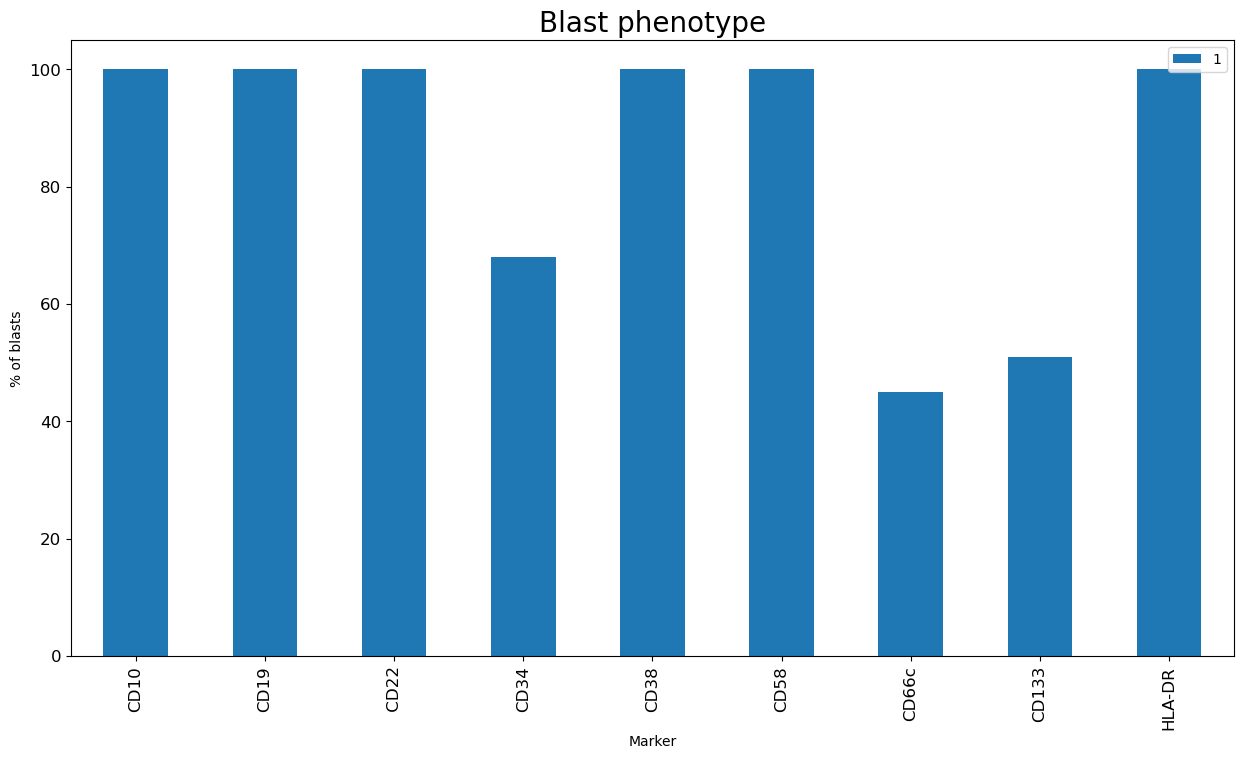

In [15]:
df=egflow * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [16]:
egflow=egflow*100

In [17]:
flow_markers=egflow.columns
flow_markers

Index(['CD10', 'CD19', ' CD22', 'CD34', 'CD38', 'CD58', 'CD66c', 'CD133',
       'HLA-DR'],
      dtype='object')

In [18]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in prot_clr.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD34 Yes
CD38 Yes
CD58 Yes
CD66c No
CD133 No
HLA-DR No
['CD10', 'CD19', 'CD34', 'CD38', 'CD58']


In [19]:
prot_clr.shape

(1011, 33)

Percentage of positive cells, based on GMM: 32.93768545994065


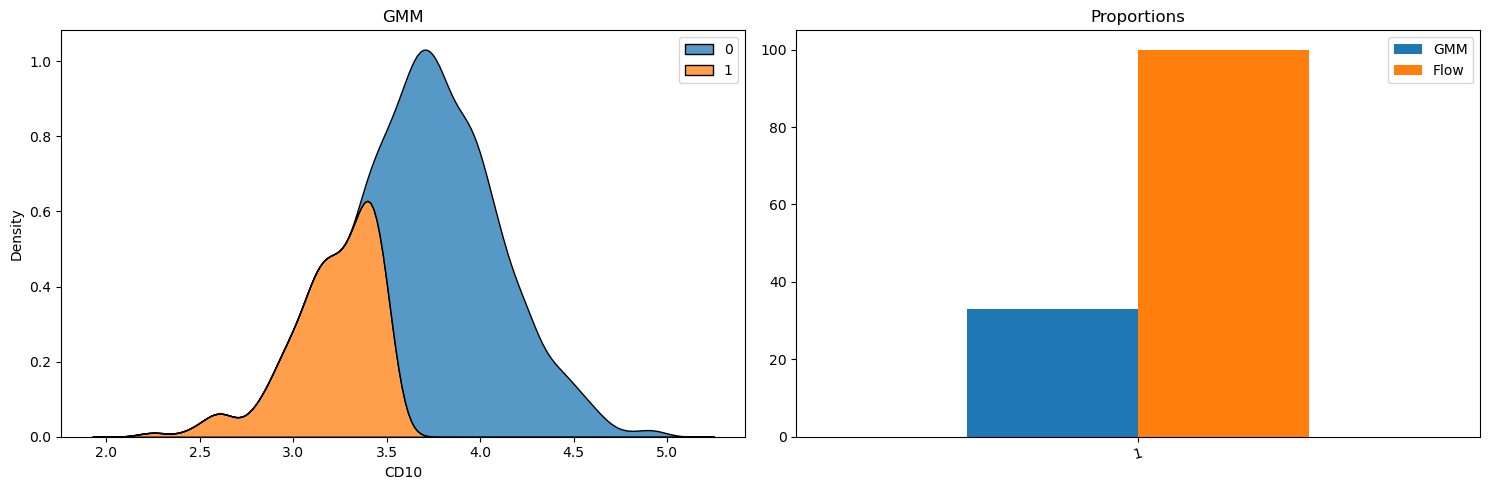

Percentage of positive cells, based on GMM: 43.42235410484669


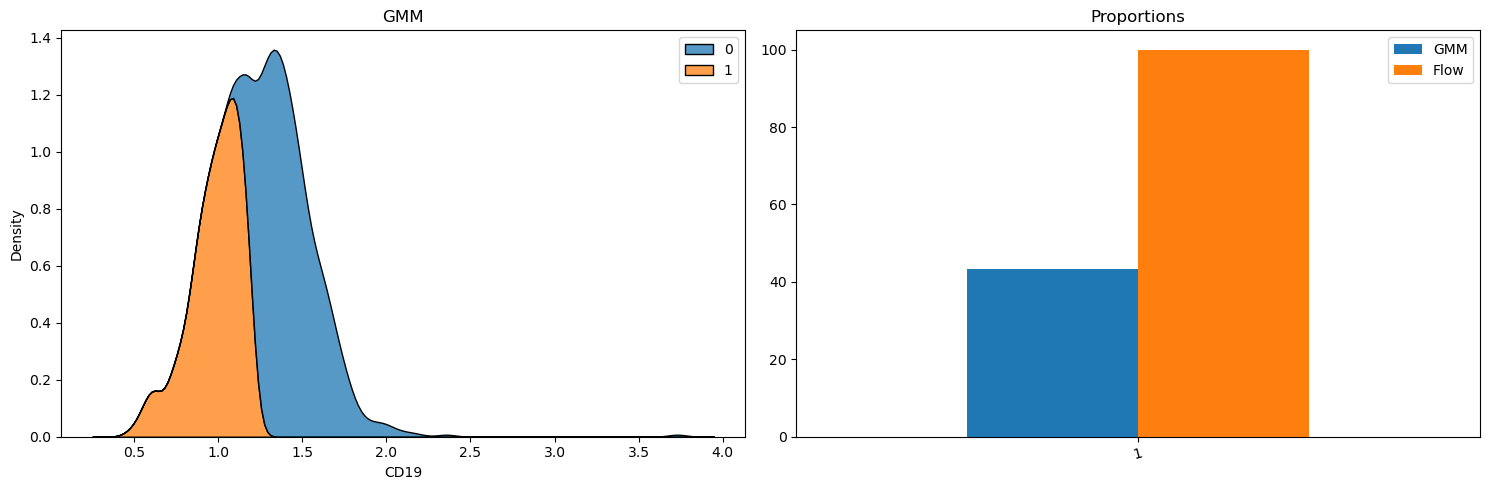

Percentage of positive cells, based on GMM: 46.09297725024728


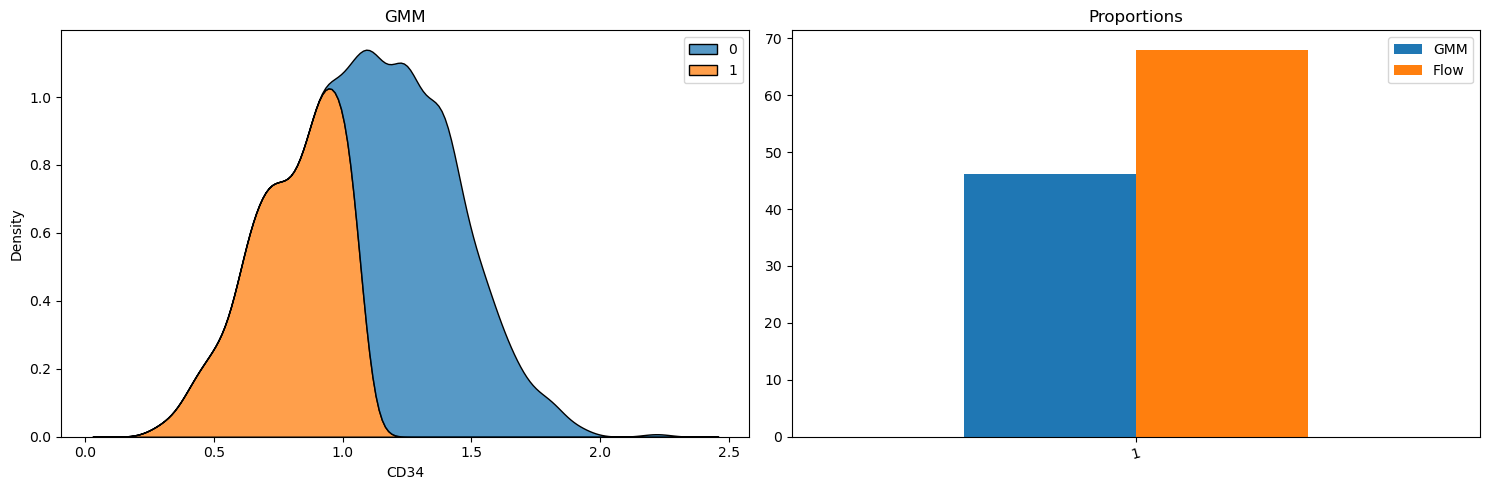

Percentage of positive cells, based on GMM: 66.07319485657764


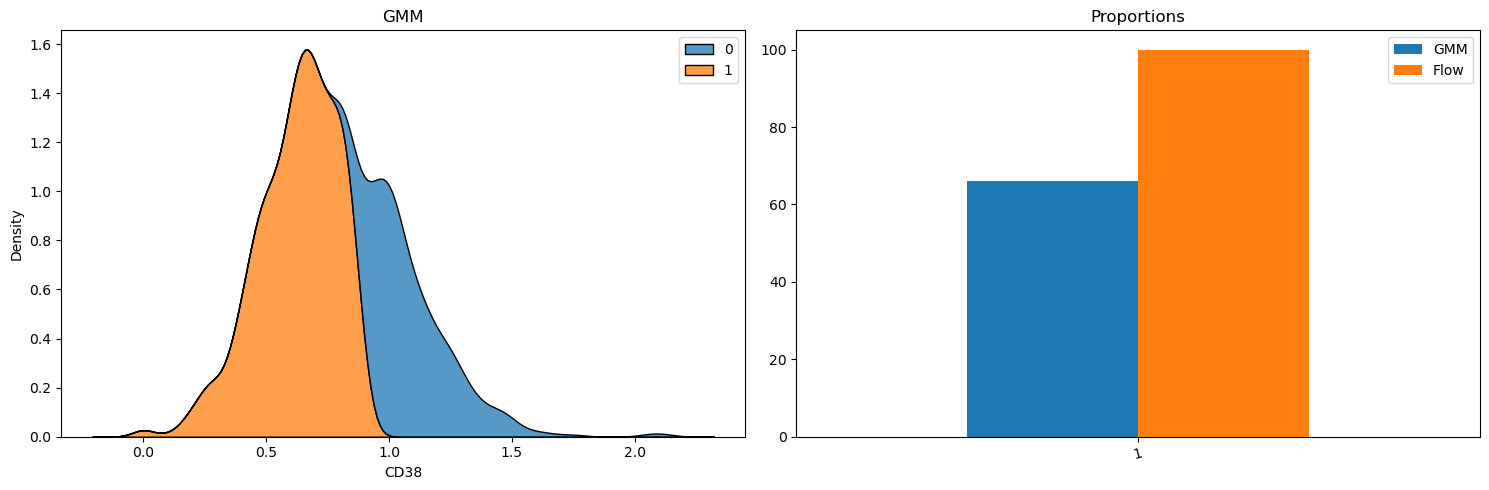

Percentage of positive cells, based on GMM: 99.20870425321465


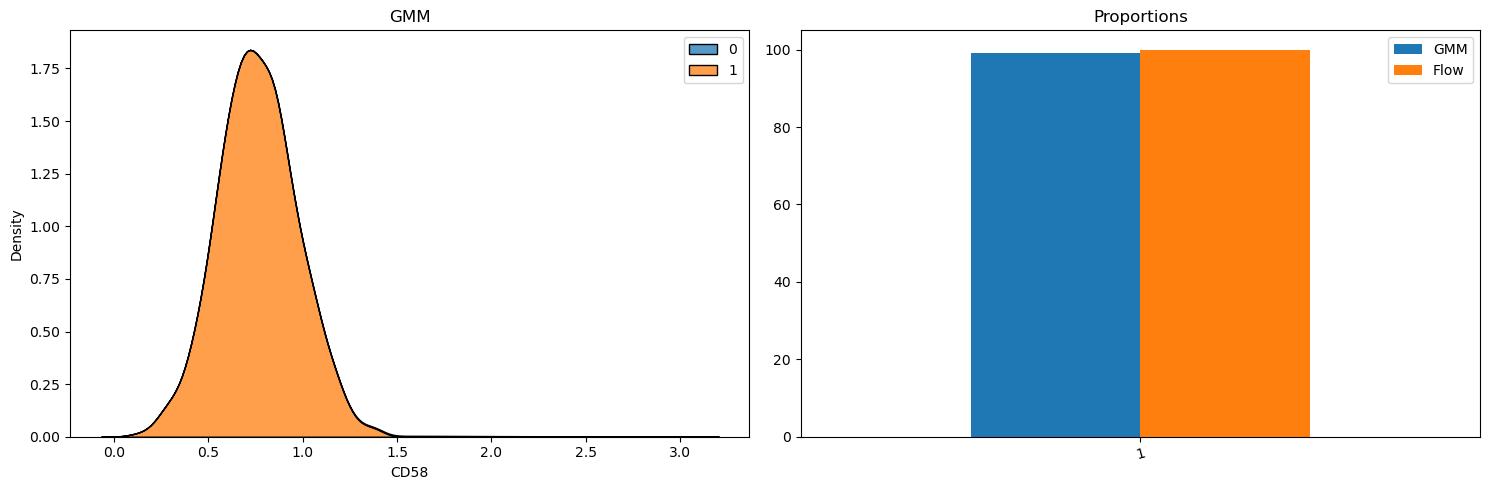

In [20]:
#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=prot_clr
n_cells=len(prot_clr)
egflow=egflow
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x= data[column_name]
    x=x.values.reshape(-1, 1)
    gmm.fit(x)
    labels = gmm.predict(x)
    
    x0 = data[column_name].reset_index(drop=True)[labels == 0].mean()
    x1 = data[column_name].reset_index(drop=True)[labels == 1].mean()
    if x0 < x1:
        labels = (~(labels == 1)).astype(int)
    
    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels==0)
    result_zeros=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels)
    result_ones=(n_ones/n_cells * 100)
    #Dataframes
    all_data = {"GMM":[result_ones],
        "Flow": egflow[column_name],
        };

    all_data= pd.DataFrame(data=all_data);
    
    ax2=all_data.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    print("Percentage of positive cells, based on GMM:", result_ones)
    
    plt.show()

## DSB Normalized

In [21]:
prot_dsb

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACGGGTCTACTTAC-1-119,5.235474,6.765774,3.392691,0.808834,3.707282,2.972158,9.732417,12.509436,2.973591,-1.510255,...,0.891578,1.754948,2.642372,0.046999,5.641718,6.519819,1.705478,1.870252,2.644428,2.188816
AAAGATGAGGAGTAGA-1-119,1.098276,7.259014,1.393066,-0.646733,-1.678327,-0.076621,1.911605,4.575176,-0.277374,-1.510255,...,0.454759,-1.025544,-0.143150,-0.384310,7.088585,5.934313,0.767981,0.640264,0.505158,1.311661
AAAGCAACACAGACTT-1-119,1.726878,5.649791,2.285491,-0.962689,0.447542,-0.641244,3.161980,4.131022,-0.277374,-0.705994,...,0.454759,-0.674252,0.707019,-0.850160,6.819550,6.734242,0.222203,0.174821,-1.242754,1.311661
AAAGCAACAGGGTATG-1-119,2.258353,8.020568,-1.144322,-1.139418,0.796405,0.182565,2.358955,7.488725,0.597070,0.028237,...,-1.055551,1.059134,-0.560621,-0.384310,8.081855,4.882566,1.259085,1.870252,0.505158,1.311661
AAAGCAACATCACAAC-1-119,3.047345,9.353902,1.068179,-0.799064,0.077523,-0.076621,5.328226,4.131022,-0.277374,1.329014,...,0.454759,-0.344264,0.225084,-0.384310,2.581179,5.473848,1.914316,2.235003,1.982996,4.218381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGCCAACAG-1-119,0.810795,9.314544,-0.924099,0.096173,-0.316384,2.041421,8.672638,2.642952,-0.762677,-0.705994,...,-0.513795,-1.401081,-0.344923,0.824153,3.034776,6.681586,-0.391966,3.224028,-1.242754,5.373164
TTTGGTTAGAGCTGCA-1-119,1.609993,6.275143,0.298399,-0.244180,1.439466,-0.950627,2.774324,7.173814,0.994076,0.028237,...,1.688773,-0.344264,0.852458,-0.850160,3.463843,6.574390,1.487356,-0.865119,0.505158,-1.362772
TTTGTCAAGGTTCCTA-1-119,1.726878,7.955753,-0.524583,2.300853,1.439466,-0.076621,5.455982,5.400477,1.368383,1.329014,...,1.301905,-0.674252,0.225084,0.824153,4.980019,6.628307,2.492271,5.959399,-0.329018,3.618855
TTTGTCAGTATCACCA-1-119,3.556360,8.214930,3.756397,1.921420,0.077523,0.662341,5.580991,4.997655,0.174433,1.911199,...,0.454759,1.059134,-0.792311,0.046999,7.088585,7.546330,1.487356,3.224028,-0.329018,5.600803


In [22]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in prot_dsb.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD34 Yes
CD38 Yes
CD58 Yes
CD66c No
CD133 No
HLA-DR No
['CD10', 'CD19', 'CD34', 'CD38', 'CD58']


Percentage of positive cells: 63.6003956478734


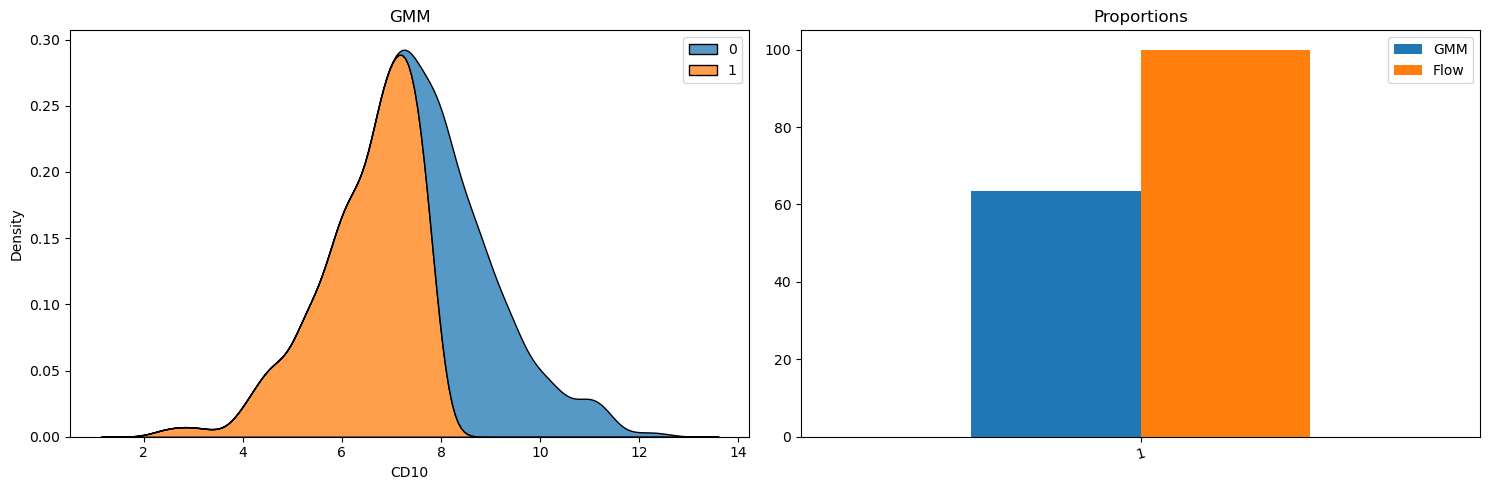

Percentage of positive cells: 49.060336300692384


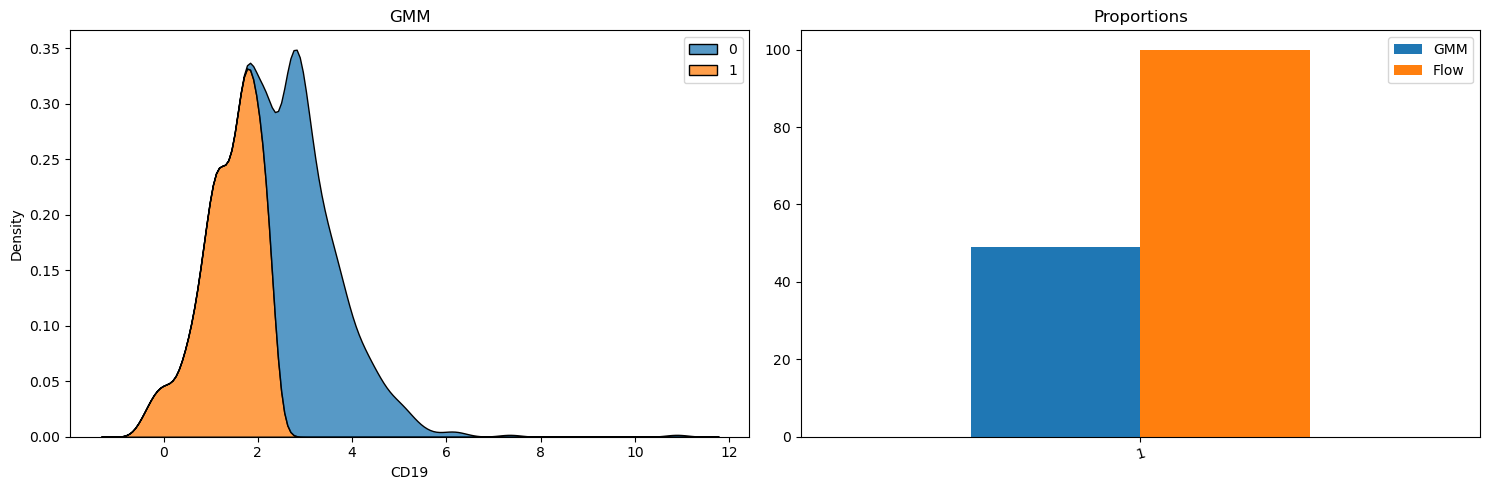

Percentage of positive cells: 53.21463897131553


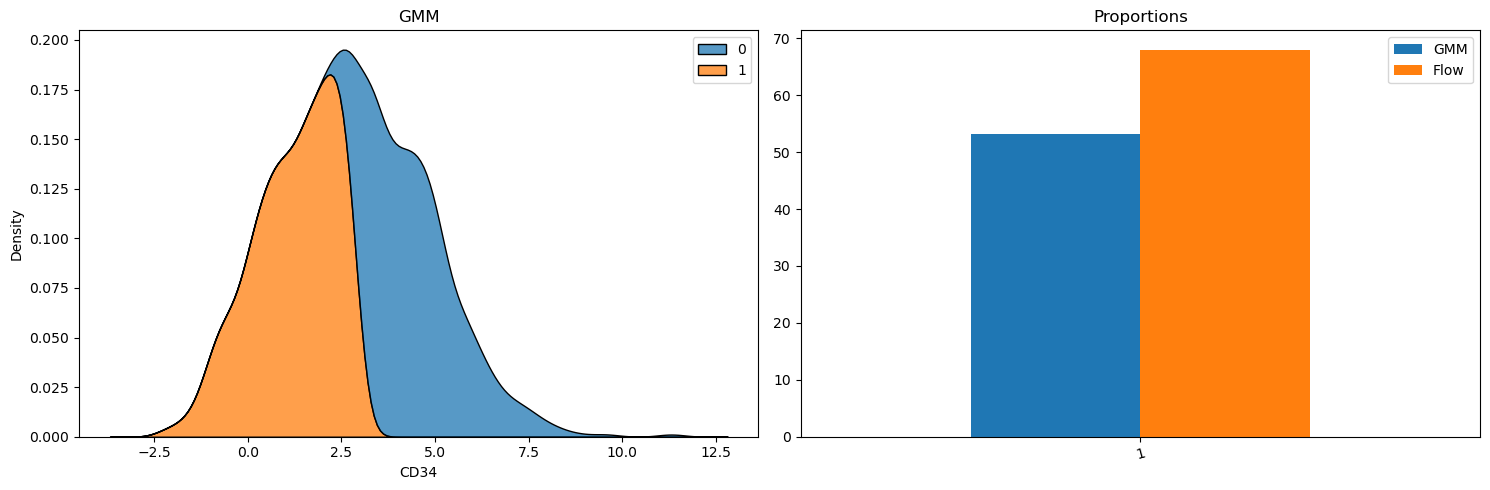

Percentage of positive cells: 68.64490603363006


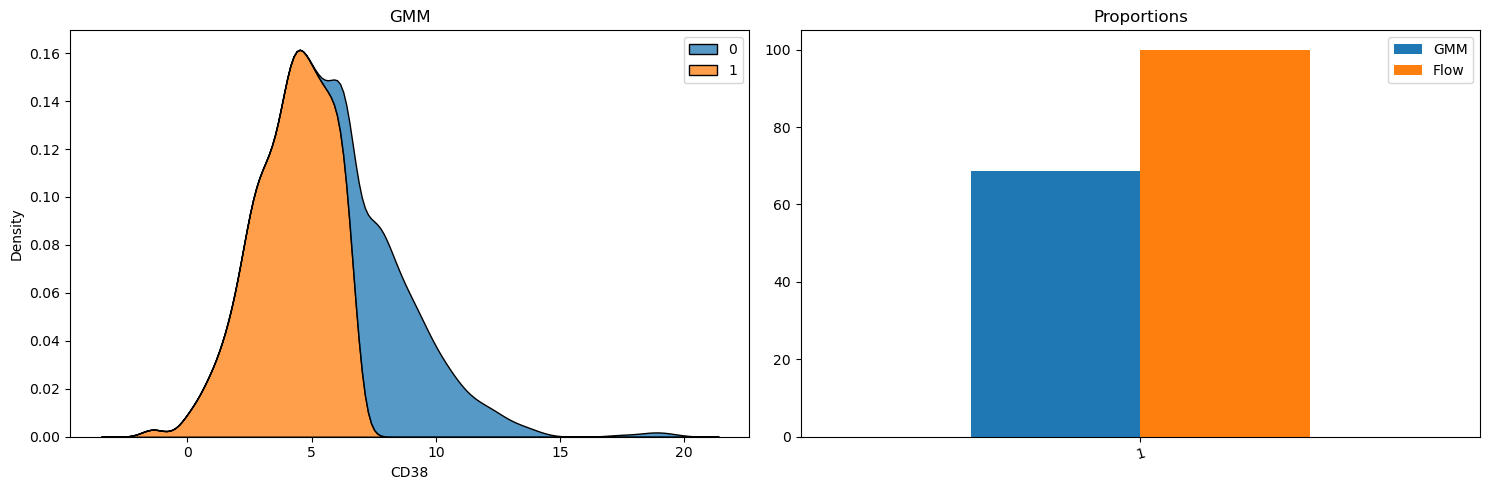

Percentage of positive cells: 80.71216617210682


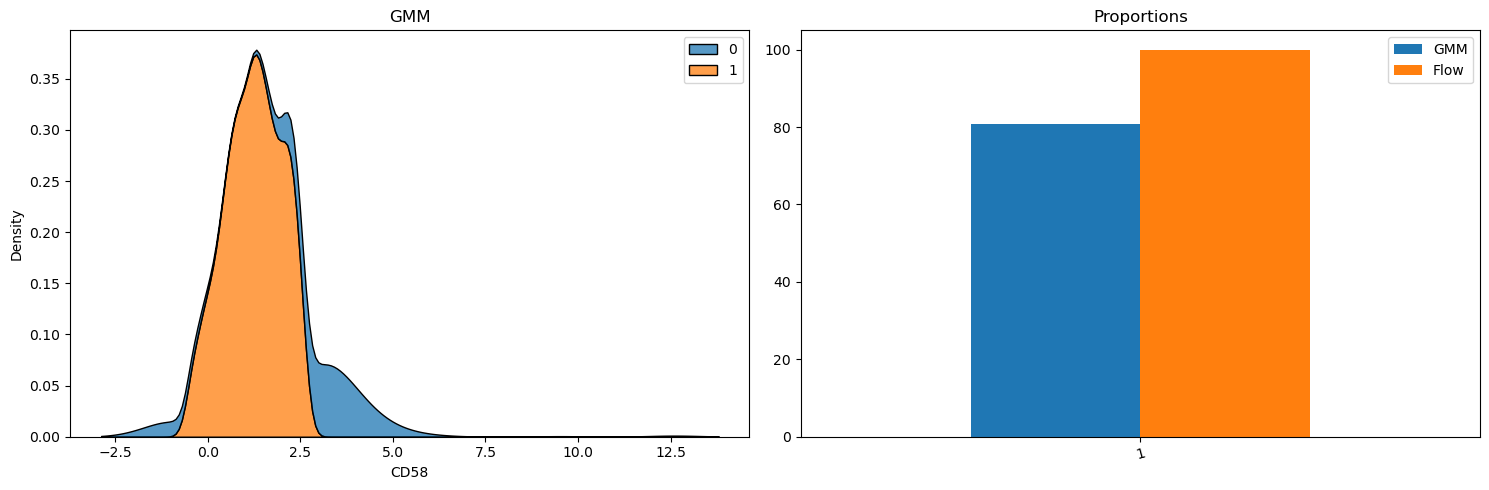

In [25]:
#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data_dsb=prot_dsb
n_cells=len(prot_dsb)
egflow=egflow 
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x2= data_dsb[column_name]
    x2=x2.values.reshape(-1, 1)
    gmm.fit(x2)
    labels2 = gmm.predict(x2)
    
    x0 = data[column_name].reset_index(drop=True)[labels2 == 0].mean()
    x1 = data[column_name].reset_index(drop=True)[labels2 == 1].mean()
    if x0 < x1:
        labels2 = (~(labels2 == 1)).astype(int)
    
    ax1 = sns.kdeplot(data=data_dsb, x=column_name, hue=labels2, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels2==0)
    result_zeros2=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels2)
    result_ones2=(n_ones/n_cells * 100)
    #Dataframes
    all_data2 = {"GMM":[result_ones2],
        "Flow": egflow[column_name],
        };

    all_data2= pd.DataFrame(data=all_data2);
    
    ax2=all_data2.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    print("Percentage of positive cells:", result_ones2)
    
    plt.show()

Percentage of positive cells: 63.6003956478734


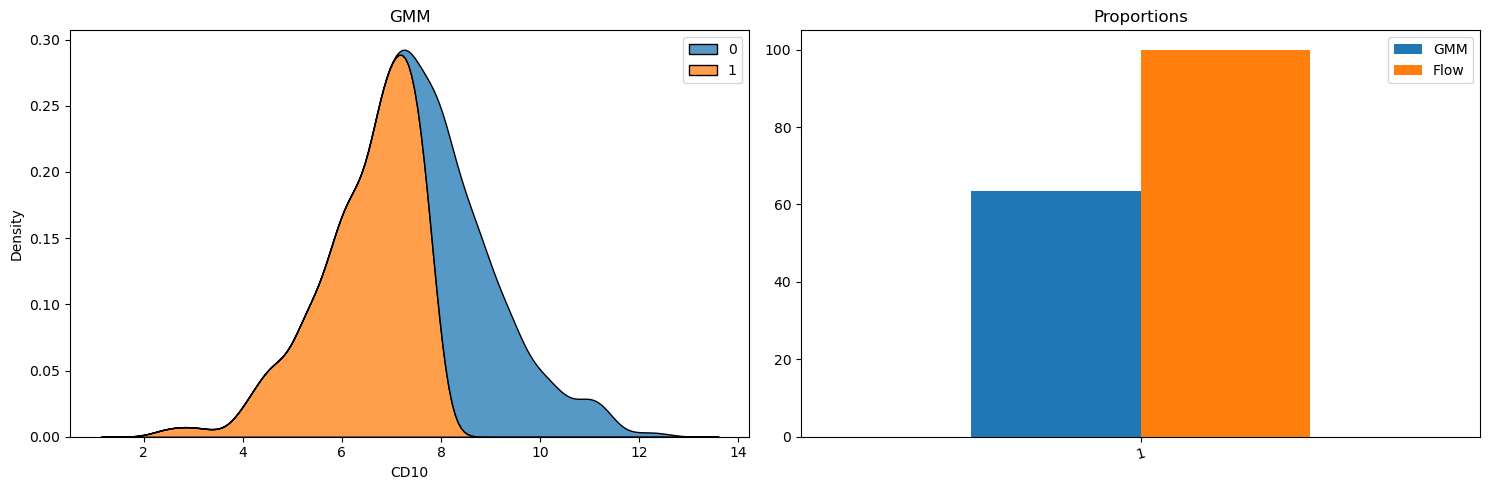

Percentage of positive cells: 49.060336300692384


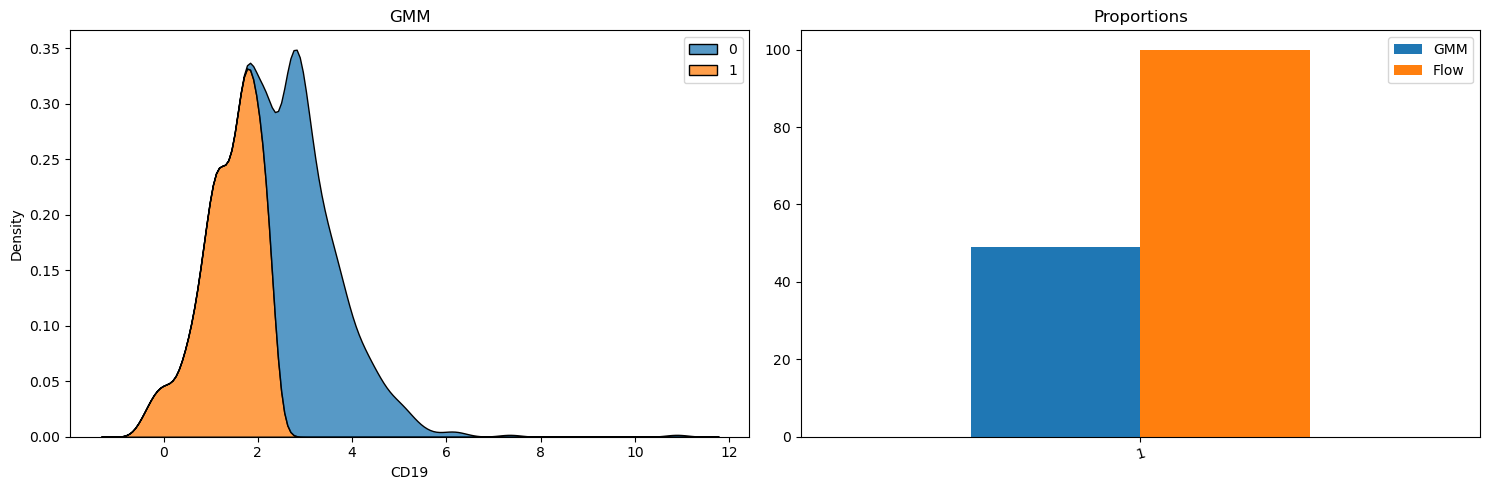

Percentage of positive cells: 53.21463897131553


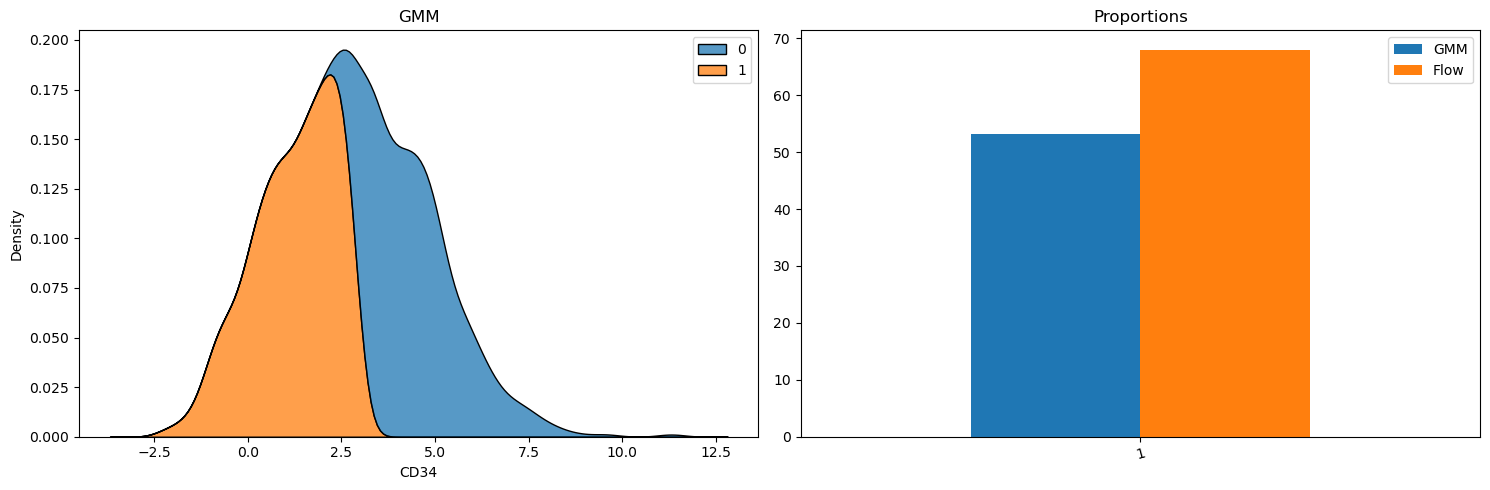

Percentage of positive cells: 68.64490603363006


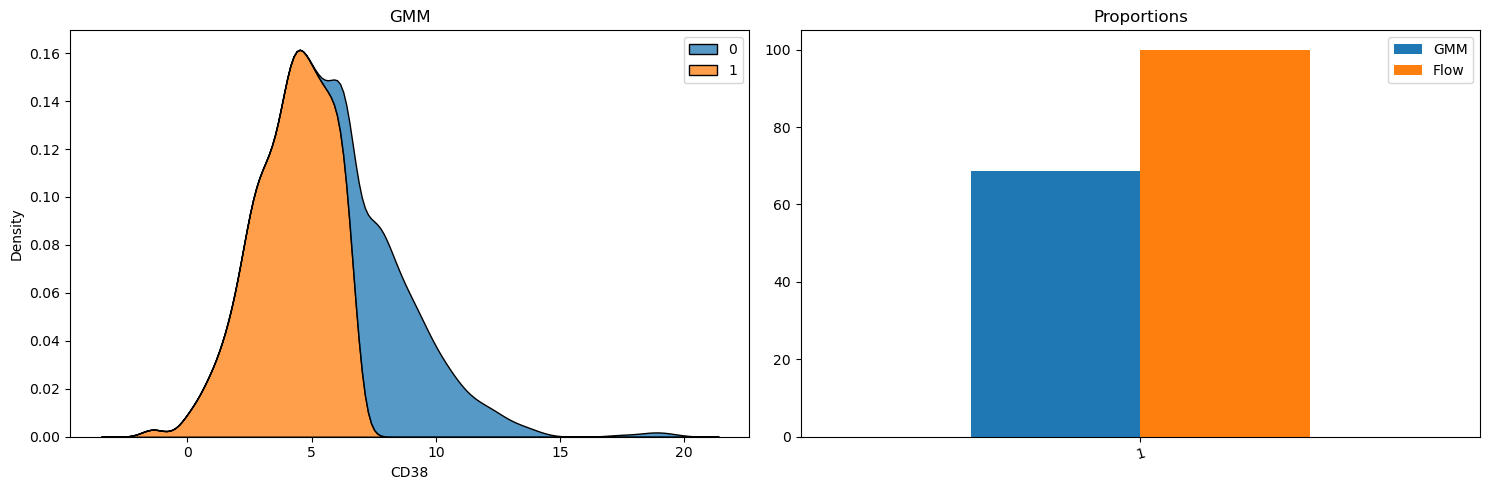

Percentage of positive cells: 80.71216617210682


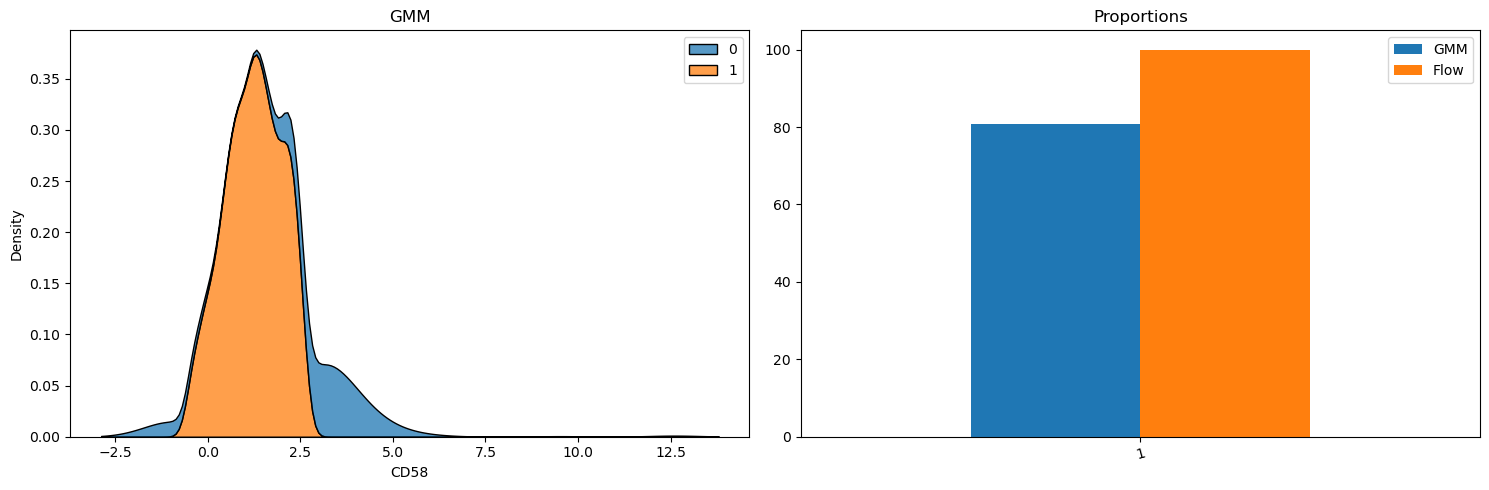

In [24]:
#Different covariance type used in the model

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "spherical",
                                      random_state = 42
                                        )
#data

data_dsb=prot_dsb
n_cells=len(prot_dsb)
egflow=egflow
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x3= data_dsb[column_name]
    x3=x3.values.reshape(-1, 1)
    gmm.fit(x3)
    labels3 = gmm.predict(x3)
    
    x0 = data[column_name].reset_index(drop=True)[labels3 == 0].mean()
    x1 = data[column_name].reset_index(drop=True)[labels3 == 1].mean()
    if x0 < x1:
        labels3 = (~(labels3 == 1)).astype(int)
    
    ax1 = sns.kdeplot(data=data_dsb, x=column_name, hue=labels3, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels3==0)
    result_zeros3=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels3)
    result_ones3=(n_ones/n_cells * 100)
    #Dataframes
    all_data3 = {"GMM":[result_ones3],
        "Flow": egflow[column_name],
        };

    all_data3= pd.DataFrame(data=all_data3);
    
    ax2=all_data3.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    print("Percentage of positive cells:", result_ones3)
    
    plt.show()

Percentage of positive cells: 37.19090009891197


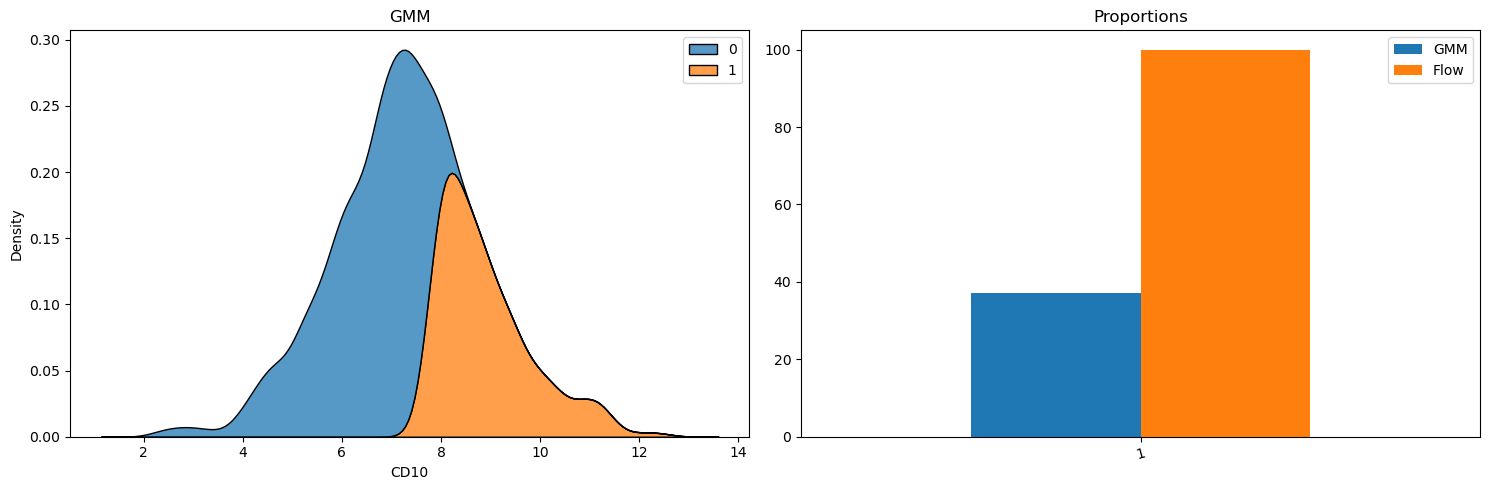

Percentage of positive cells: 56.97329376854599


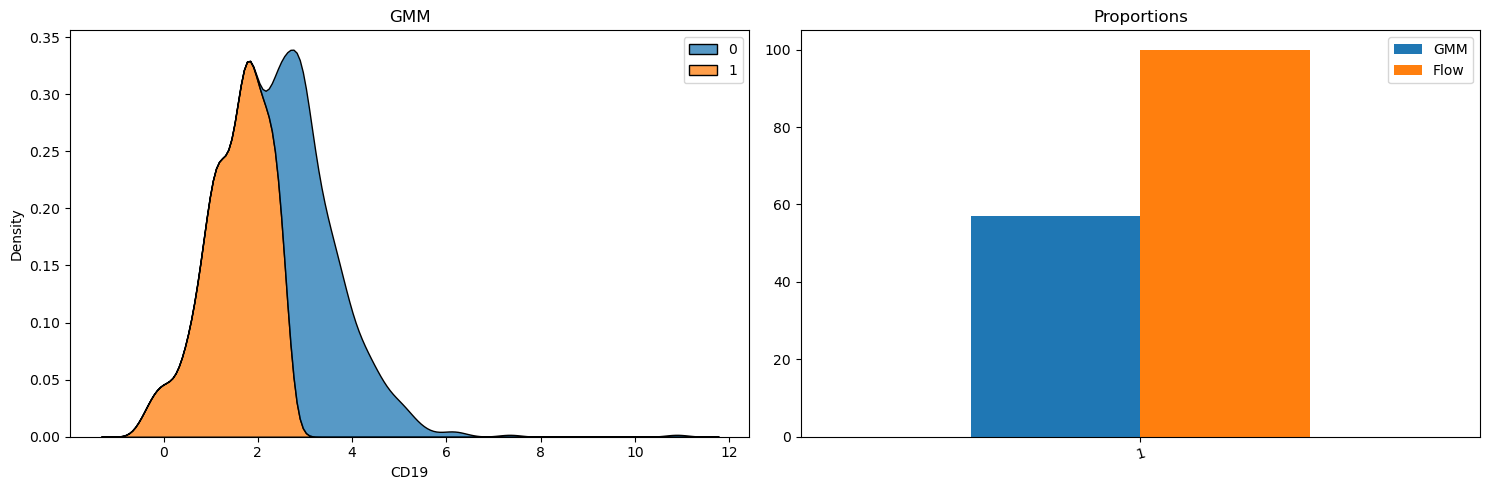

Percentage of positive cells: 44.11473788328388


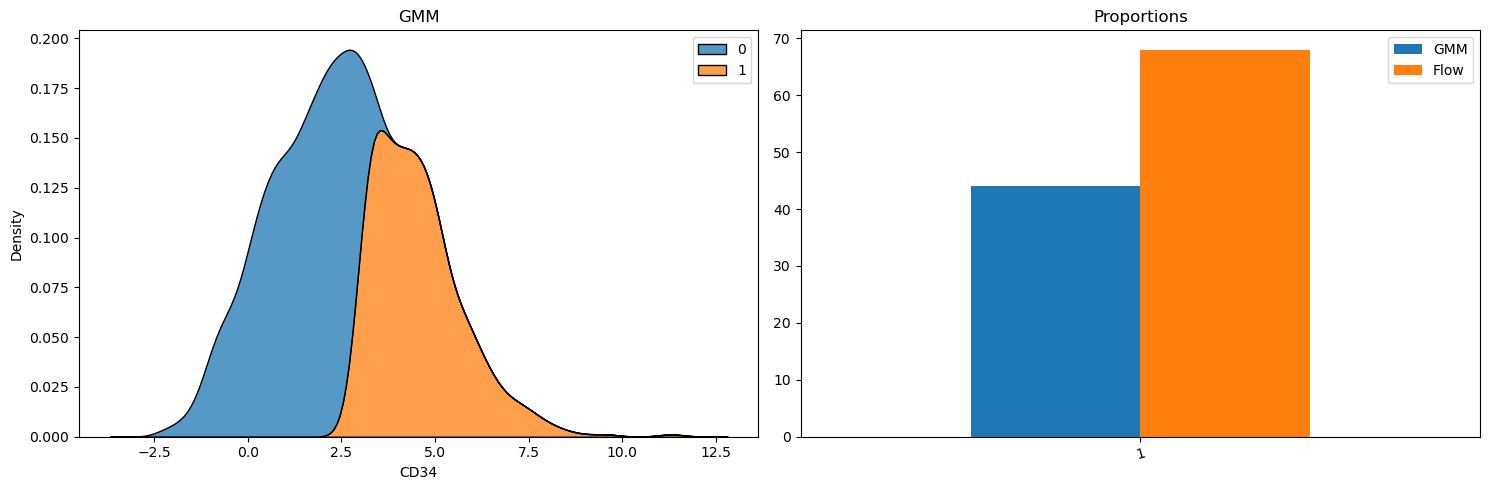

Percentage of positive cells: 81.60237388724035


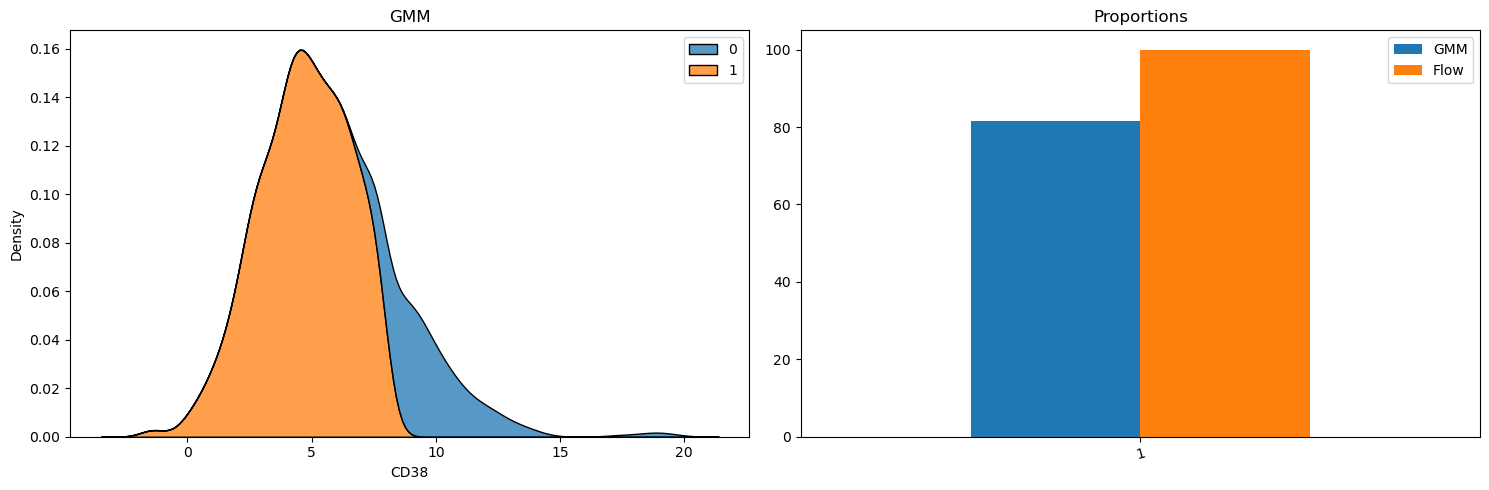

Percentage of positive cells: 88.4272997032641


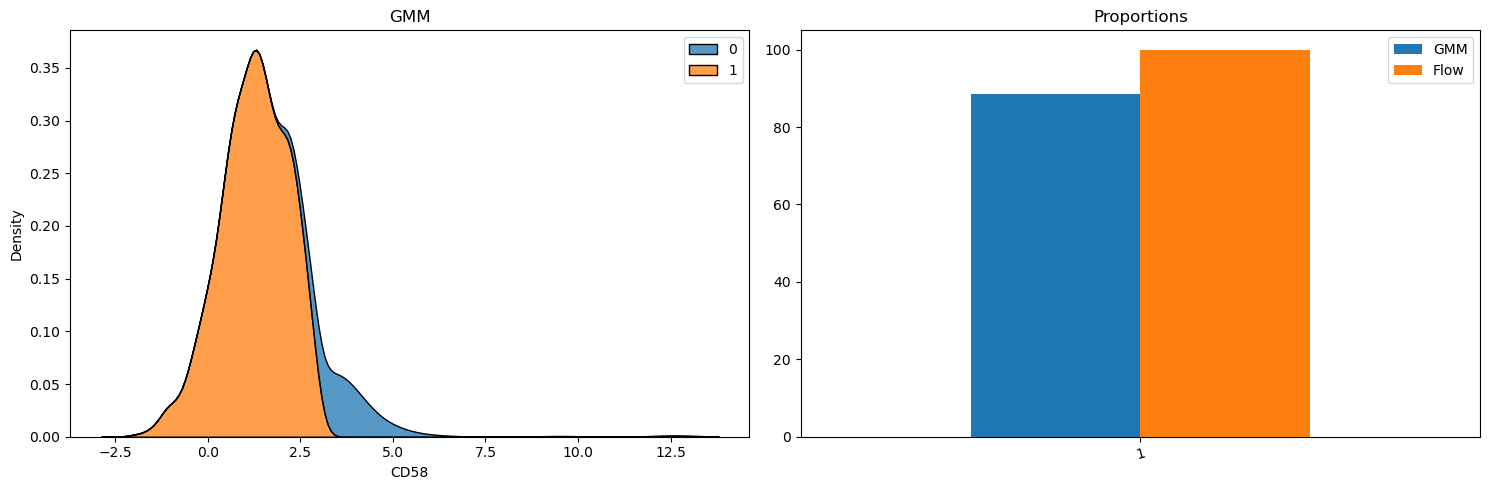

In [49]:
#Different covariance type used in the model

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "tied",
                                      random_state = 42
                                        )
#data

data_dsb=prot_dsb
n_cells=len(prot_dsb)
egflow=egflow
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x4= data_dsb[column_name]
    x4=x4.values.reshape(-1, 1)
    gmm.fit(x4)
    labels4 = gmm.predict(x4)
    
    ax1 = sns.kdeplot(data=data_dsb, x=column_name, hue=labels4, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels4==0)
    result_zeros4=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels4)
    result_ones4=(n_ones/n_cells * 100)
    #Dataframes
    all_data4 = {"GMM":[result_ones4],
        "Flow": egflow[column_name],
        };

    all_data4= pd.DataFrame(data=all_data4);
    
    ax2=all_data4.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    print("Percentage of positive cells:", result_ones4)
    
    plt.show()

Percentage of positive cells: 63.6003956478734


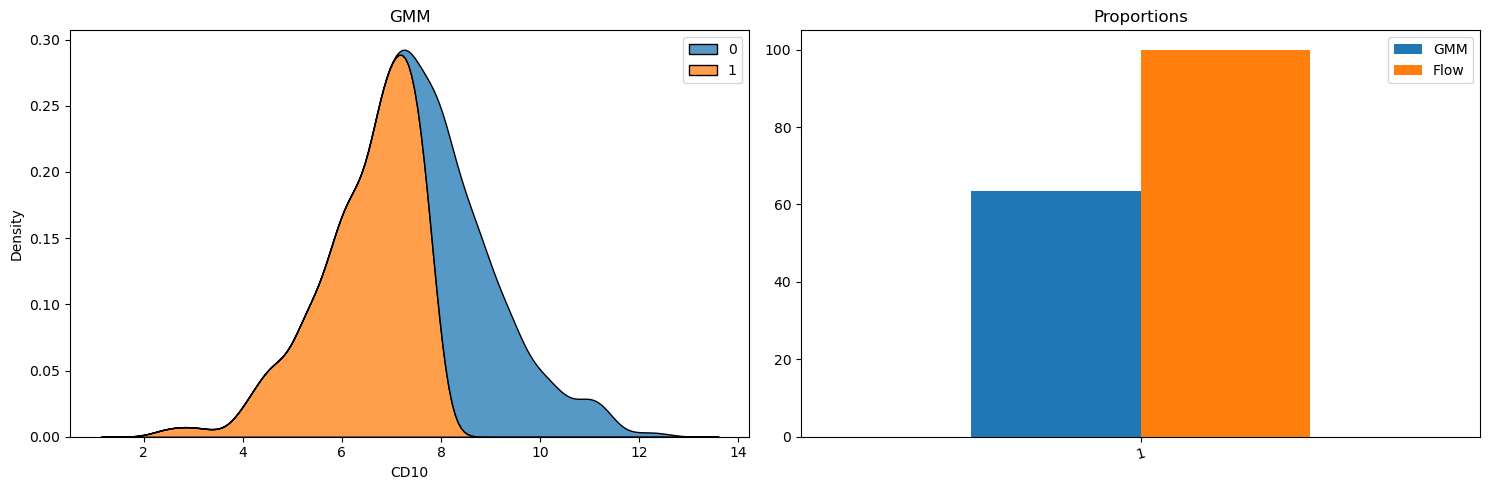

Percentage of positive cells: 49.060336300692384


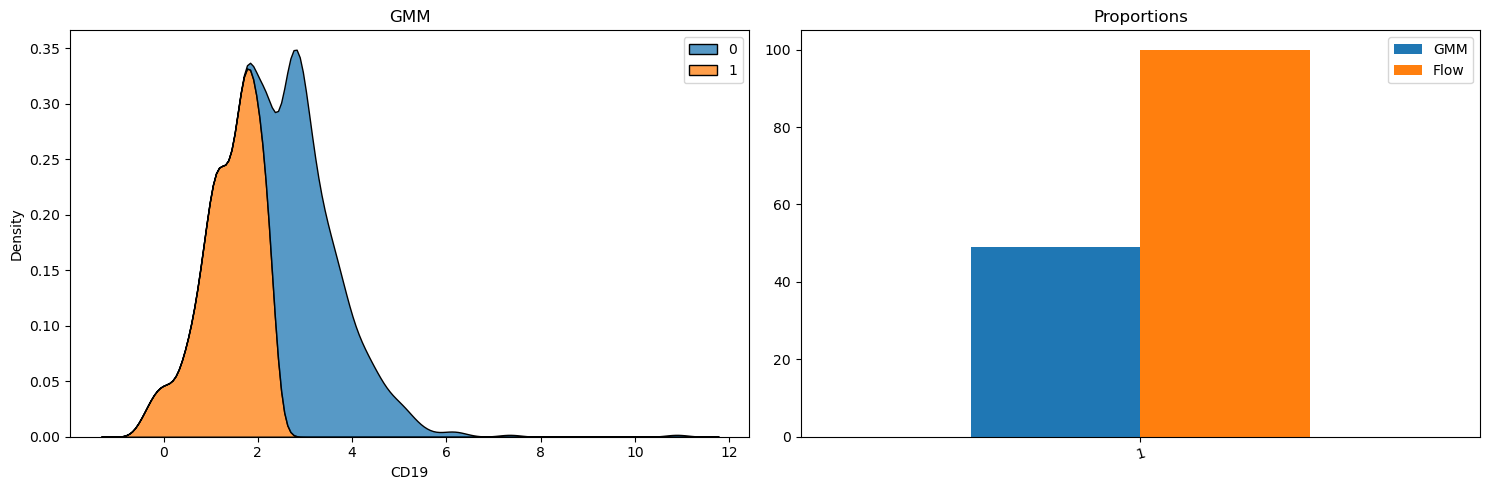

Percentage of positive cells: 53.21463897131553


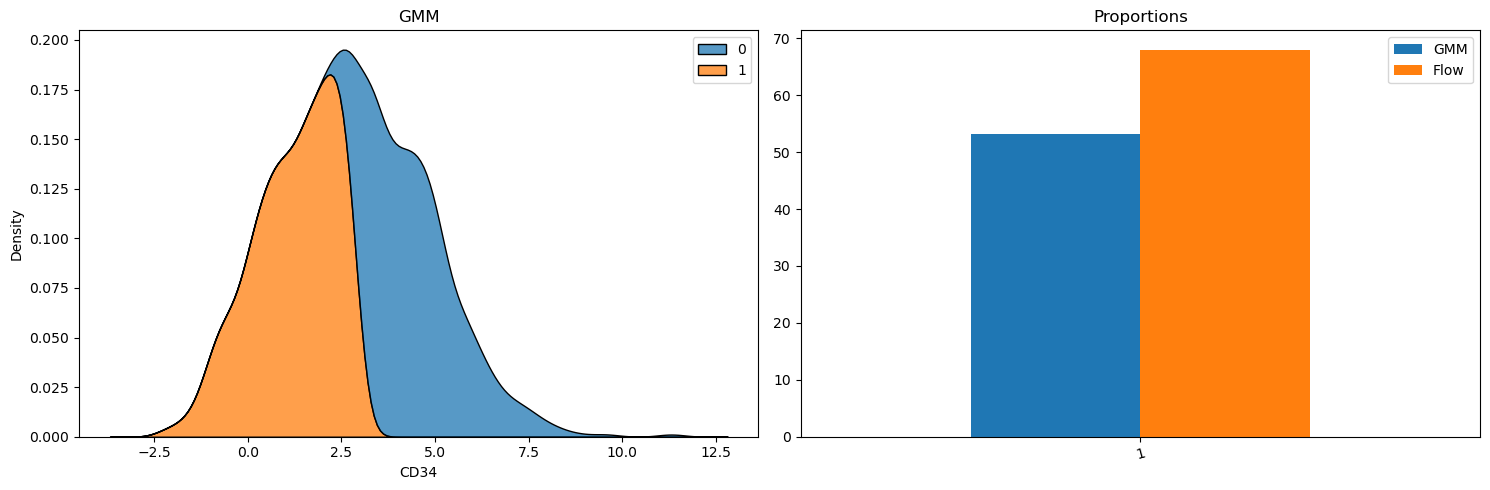

Percentage of positive cells: 68.64490603363006


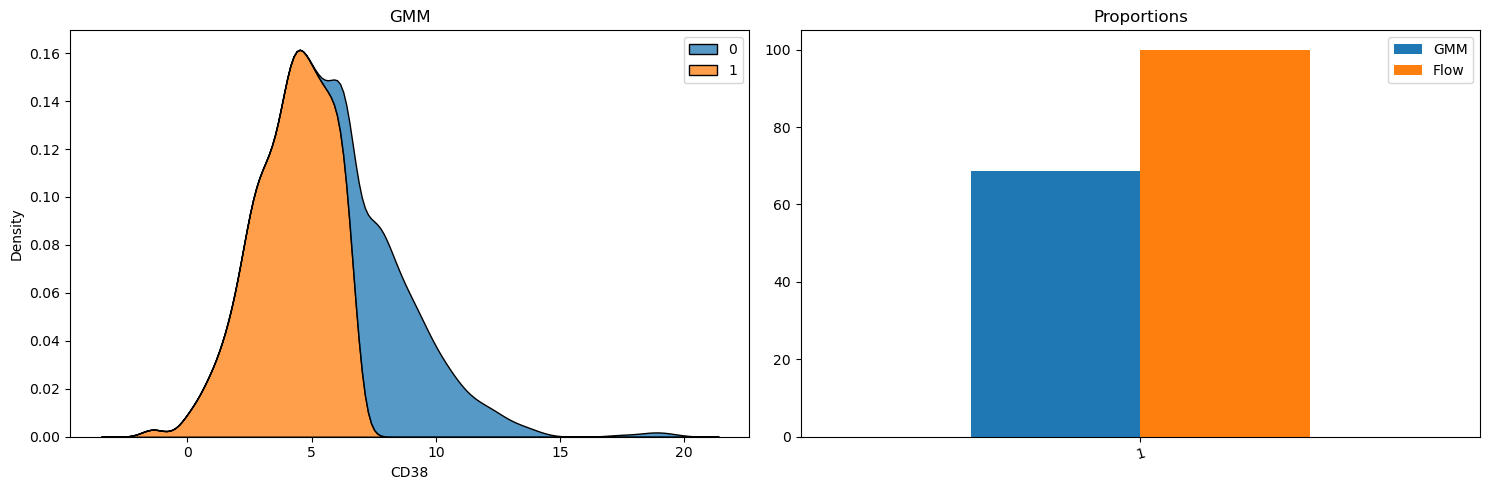

Percentage of positive cells: 80.71216617210682


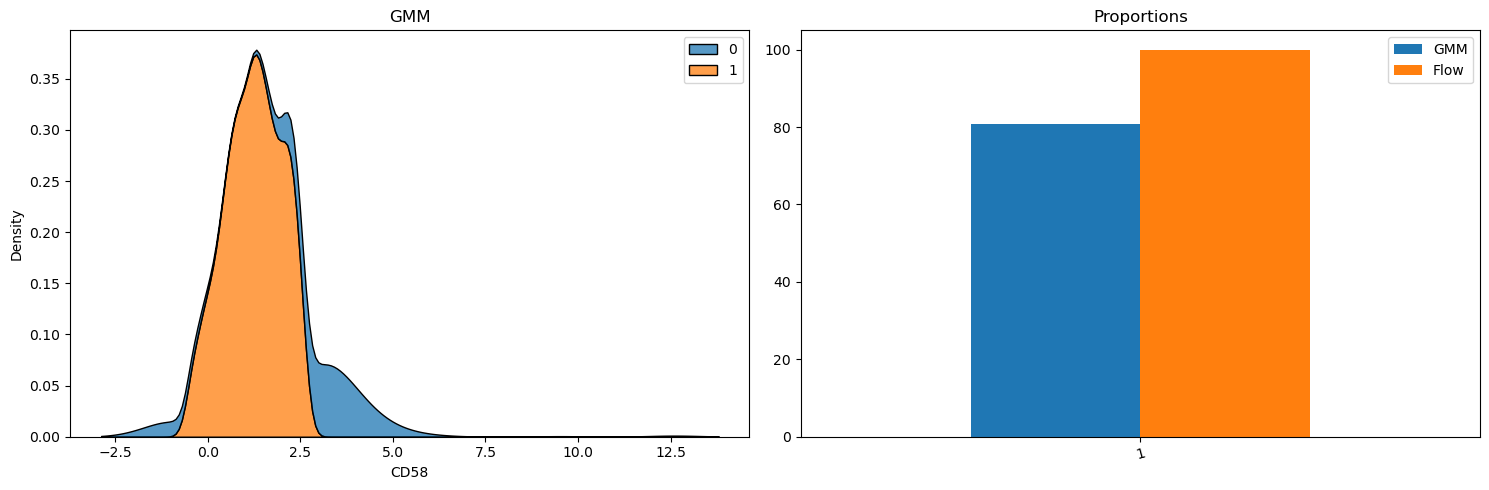

In [22]:
#Different covariance type used in the model

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "diag",
                                      random_state = 42
                                        )
#data

data_dsb=prot_dsb
n_cells=len(prot_dsb)
egflow=egflow
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x5= data_dsb[column_name]
    x5=x5.values.reshape(-1, 1)
    gmm.fit(x5)
    labels5= gmm.predict(x5)
    
    x0 = data[column_name].reset_index(drop=True)[labels5 == 0].mean()
    x1 = data[column_name].reset_index(drop=True)[labels5 == 1].mean()
    if x0 < x1:
        labels5 = (~(labels5 == 1)).astype(int)
    
    ax1 = sns.kdeplot(data=data_dsb, x=column_name, hue=labels5, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels5==0)
    result_zeros5=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels5)
    result_ones5=(n_ones/n_cells * 100)
    #Dataframes
    all_data5 = {"GMM":[result_ones5],
        "Flow": egflow[column_name],
        };

    all_data5= pd.DataFrame(data=all_data5);
    
    ax2=all_data5.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    print("Percentage of positive cells:", result_ones5)
    
    plt.show()

In [60]:
labels_CLR

0       1
1       0
2       1
3       0
4       0
       ..
1006    0
1007    1
1008    0
1009    0
1010    0
Length: 1011, dtype: int64

## Both normalization methods

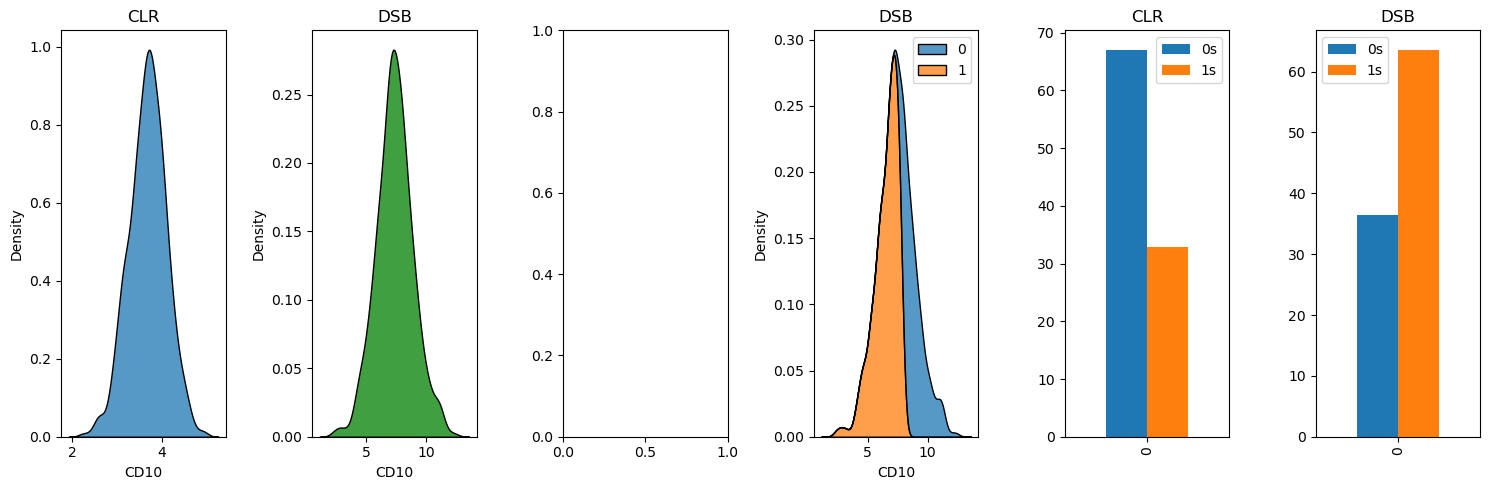

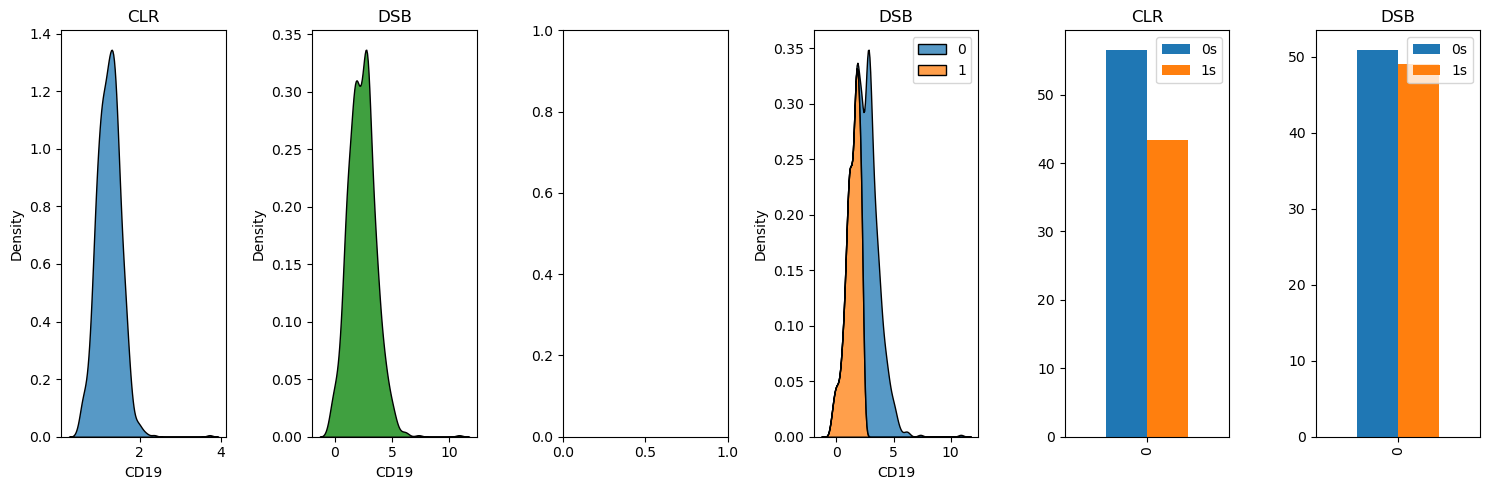

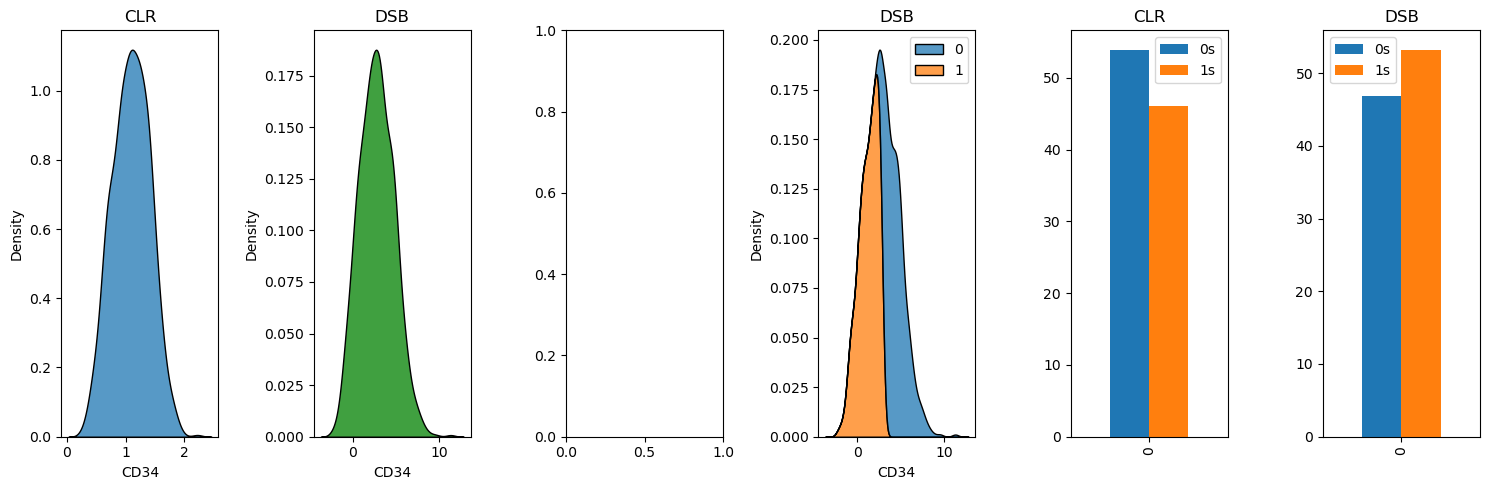

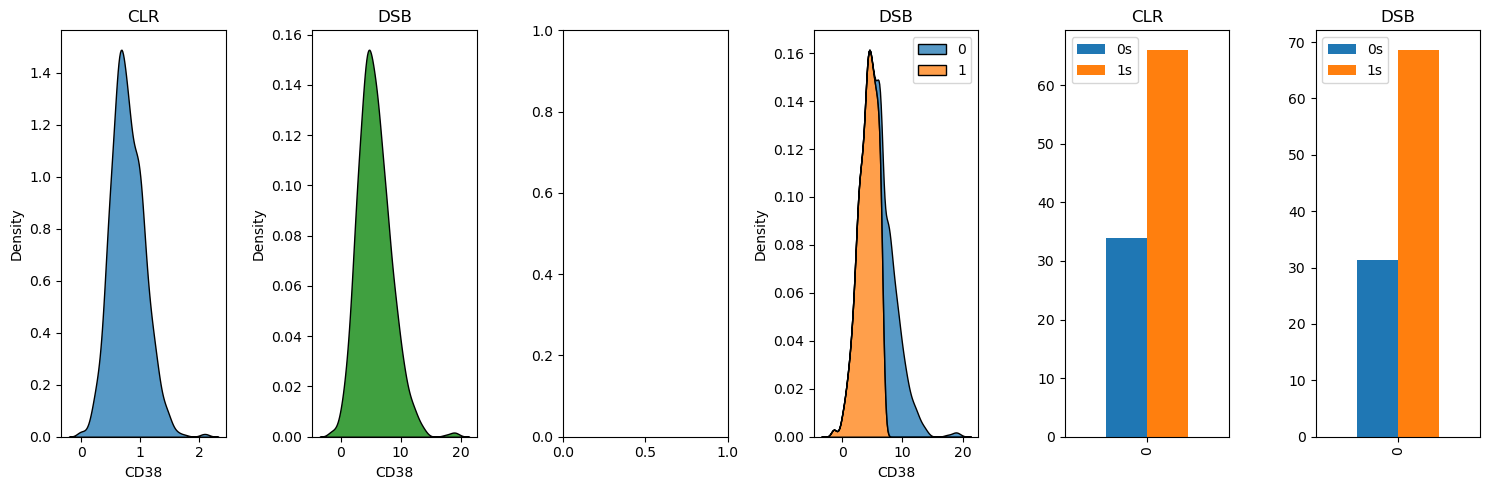

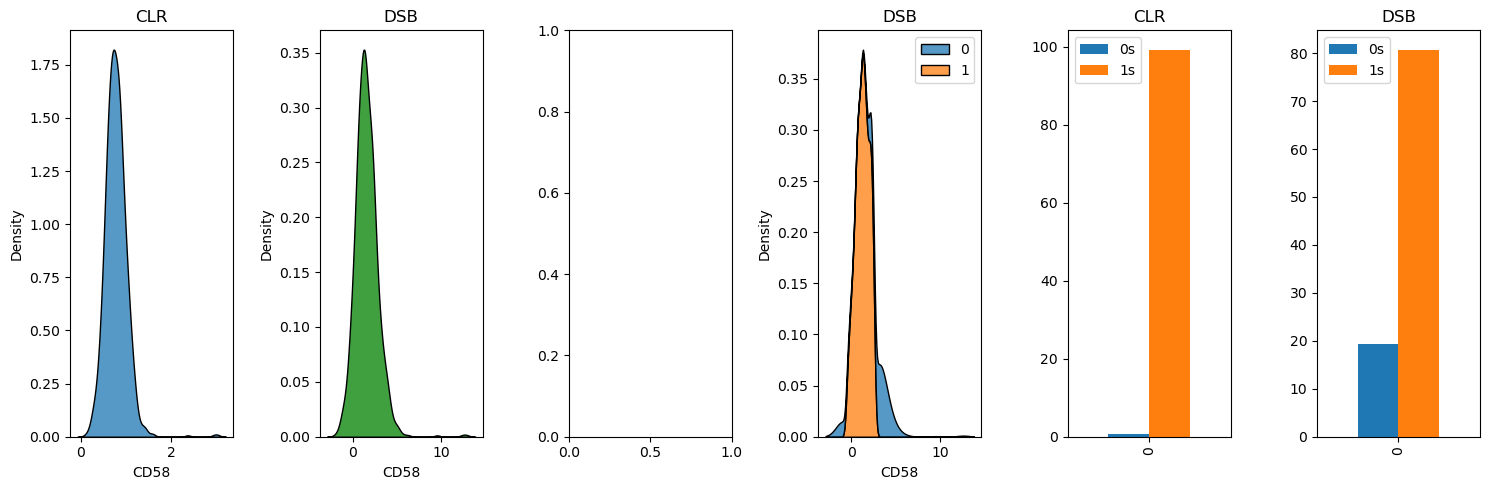

In [24]:
#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )


for column_name in column_names:
    fig, ax =plt.subplots(1,6,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    #Original density plots
    ax1 = sns.kdeplot(data=prot_clr, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=prot_dsb, x=column_name, multiple="stack", color="g", ax=ax[1]) ;

    
    ax1.title.set_text('CLR')    #headings for subplots
    ax2.title.set_text('DSB')

    
    #CLR
    x_CLR= prot_clr[column_name]
    x_CLR=x_CLR.values.reshape(-1, 1)
    gmm.fit(x_CLR)
    labels_CLR = gmm.predict(x_CLR)
    labels_CLR = pd.Series(labels_CLR)
    
    x0 = prot_clr[column_name].reset_index(drop=True)[labels_CLR == 0].mean()
    x1 = prot_clr[column_name].reset_index(drop=True)[labels_CLR == 1].mean()
    if x0 < x1:
        labels_CLR = (~(labels_CLR == 1)).astype(int)
    
    #ax3 = sns.kdeplot(data=prot_clr, x=column_name, hue=labels_CLR, multiple="stack", ax=ax[2]) ;
    #ax3.title.set_text('CLR')   
    
    #DSB
    x_DSB = prot_dsb[column_name]
    x_DSB=x_DSB.values.reshape(-1, 1)
    gmm.fit(x_DSB)
    labels_DSB = gmm.predict(x_DSB)

    x0 = prot_dsb[column_name].reset_index(drop=True)[labels_DSB == 0].mean()
    x1 = prot_dsb[column_name].reset_index(drop=True)[labels_DSB == 1].mean()
    if x0 < x1:
        labels_DSB = (~(labels_DSB == 1)).astype(int)
    
    ax4 = sns.kdeplot(data=prot_dsb, x=column_name, hue=labels_DSB, multiple="stack", color="g", ax=ax[3]) ;
    
    ax4.title.set_text('DSB')

    #Calculate zeros
    n_zeros1 = np.count_nonzero(labels_CLR==0)
    n_zeros2 = np.count_nonzero(labels_DSB==0)
    result_zeros_CLR=(n_zeros1/n_cells * 100)
    result_zeros_DSB=(n_zeros2/n_cells * 100)
    #Calculate ones
    n_ones_CLR=np.count_nonzero(labels_CLR)
    n_ones_DSB=np.count_nonzero(labels_DSB)
    #percentages
    result_ones_CLR=(n_ones_CLR/n_cells * 100)
    result_ones_DSB=(n_ones_DSB/n_cells * 100)
    #Dataframes
    data_CLR = {"0s":[result_zeros_CLR],
        "1s":[result_ones_CLR]
        };

    dataFrame_CLR = pd.DataFrame(data=data_CLR)
    
    data_DSB = { "0s":[result_zeros_DSB],
        "1s":[result_ones_DSB]
        };
    dataFrame_DSB = pd.DataFrame(data=data_DSB)
    
    ax5= dataFrame_CLR.plot.bar(title=column_name, ax=ax[4]);
    ax6= dataFrame_DSB.plot.bar(title=column_name, ax=ax[5]);

    ax5.title.set_text('CLR')    #headings for subplots
    ax6.title.set_text('DSB')
    plt.show()

